<a href="https://colab.research.google.com/github/r1ahul1/dap/blob/main/week4_wed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

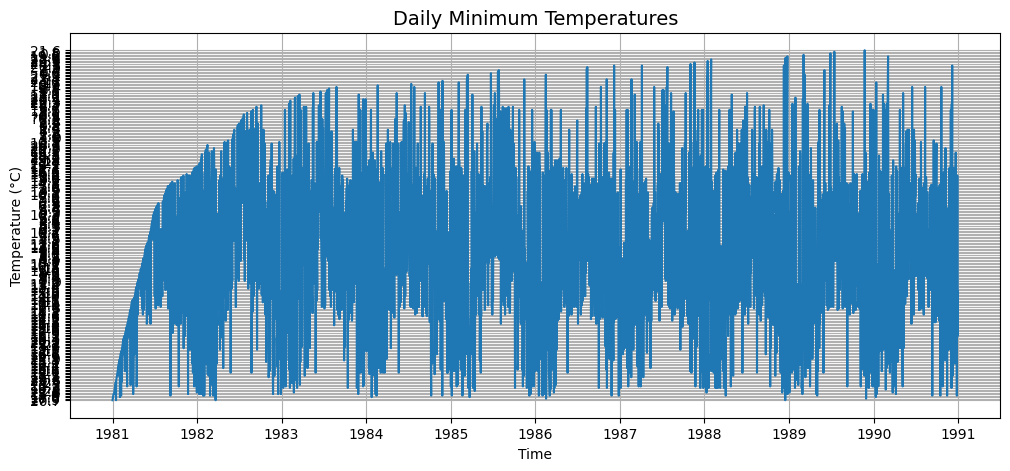

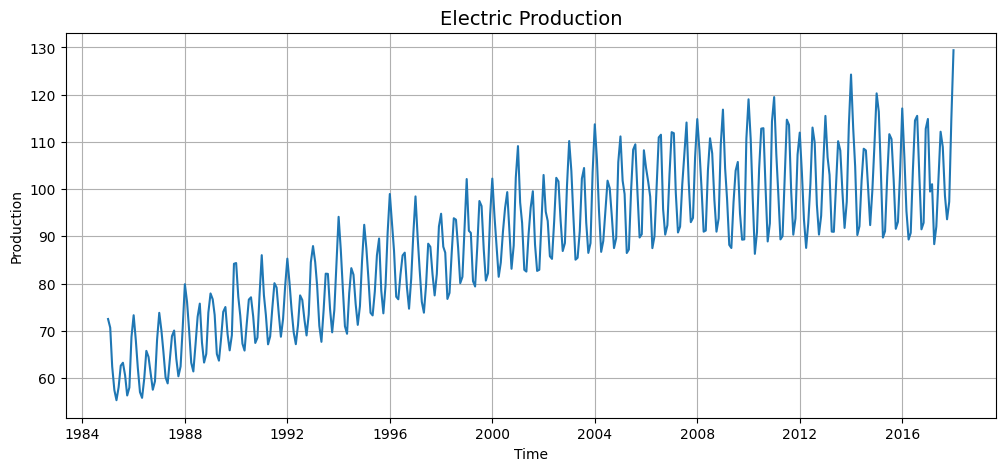

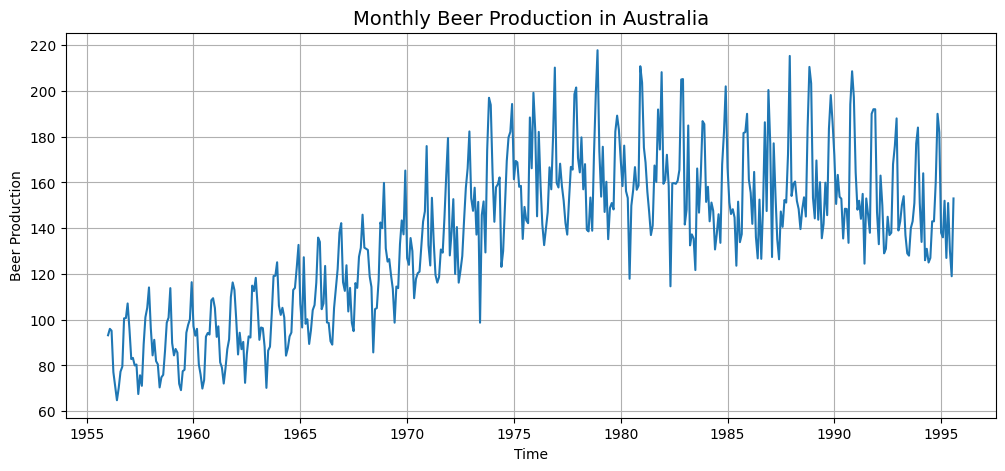

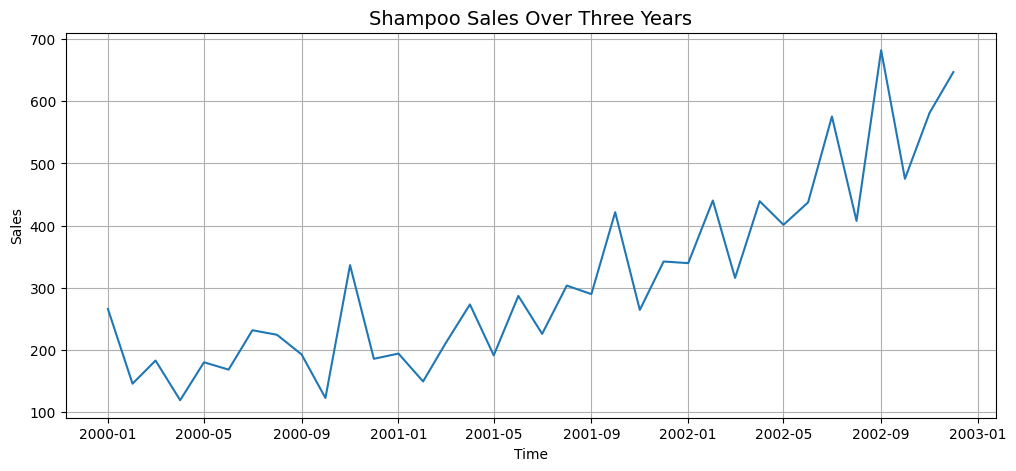

Daily Minimum Temperatures:
        Daily minimum temperatures
count                        3650
unique                        230
top                            10
freq                           51 

Electric Production:
        IPG2211A2N
count  397.000000
mean    88.847218
std     15.387834
min     55.315100
25%     77.105200
50%     89.779500
75%    100.524400
max    129.404800 

Monthly Beer Production:
        Monthly beer production
count               476.000000
mean                136.395378
std                  33.738725
min                  64.800000
25%                 112.900000
50%                 139.150000
75%                 158.825000
max                 217.800000 

Shampoo Sales:
        Sales of shampoo over a three year period
count                                  36.000000
mean                                  312.600000
std                                   148.937164
min                                   119.300000
25%                                   192.450

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file1 = "/content/daily-minimum-temperatures-in-me.csv"
file2 = "/content/Electric_Production.csv"
file3 = "/content/monthly-beer-production-in-austr.csv"
file4 = "/content/sales-of-shampoo-over-a-three-ye.csv"


df1 = pd.read_csv(file1, parse_dates=['Date'], index_col='Date')


df2 = pd.read_csv(file2, parse_dates=['DATE'], index_col='DATE')

df3 = pd.read_csv(file3, parse_dates=['Month'], index_col='Month')

def parse_shampoo_date(date_str):
    parts = date_str.split('-')
    year_cycle = int(parts[0])
    month_abbr = parts[1]
    year = 2000 + year_cycle - 1
    return f'01-{month_abbr}-{year}'

df4 = pd.read_csv(file4)
df4['Month'] = df4['Month'].apply(parse_shampoo_date)
df4['Month'] = pd.to_datetime(df4['Month'], format='%d-%b-%Y')
df4 = df4.set_index('Month')



def plot_series(df, title, ylabel):
    plt.figure(figsize=(12,5))

    plt.plot(df.iloc[:, 0], marker='', linewidth=1.5)
    plt.title(title, fontsize=14)
    plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_series(df1, "Daily Minimum Temperatures", "Temperature (°C)")
plot_series(df2, "Electric Production", "Production")
plot_series(df3, "Monthly Beer Production in Australia", "Beer Production")
plot_series(df4, "Shampoo Sales Over Three Years", "Sales")

# --- Show basic statistics ---
print("Daily Minimum Temperatures:\n", df1.describe(), "\n")
print("Electric Production:\n", df2.describe(), "\n")
print("Monthly Beer Production:\n", df3.describe(), "\n")
print("Shampoo Sales:\n", df4.describe(), "\n")